<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">Homework 1 </div><br/>
<div style="font-size: 18pt;">- Estimate linear regression model for Diabetes dataset</div><br/>


# Tasks: 
1. Choose five independent variables from features (X dataframe)
2. State what sign of estimated parameters do you expect and why
3. Estimate a linear regression, with diabetes progression as dependent variable (y)
4. Comment on R2 and statistical significance of estimated parameters
5. Comment on whether your sign expectations (see 2 above) were correct.
6. Send presentation to prof. Rybinski, details in class

In [84]:
from sklearn import datasets
import pandas as pd
import statsmodels.api as sm

In [85]:
diabetes = datasets.load_diabetes()
pd.DataFrame(diabetes.data, columns=diabetes.feature_names ).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [86]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [87]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) 

In [88]:
y = pd.DataFrame(diabetes.target, columns=['Diabetes_progression']) 

In [89]:
X.shape, y.shape

((442, 10), (442, 1))

In [90]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [91]:
y.head()

,Diabetes_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [92]:
#check for multicollinearity, which independent variables (factors) you cannot use together in the model
X.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

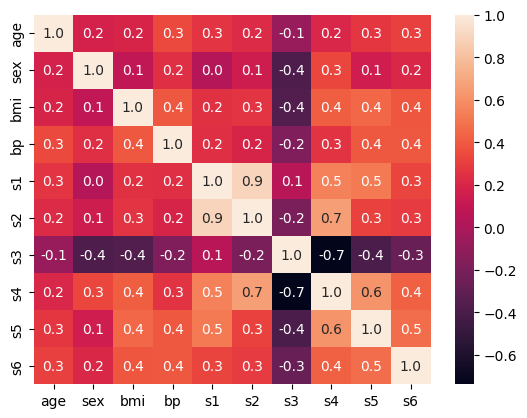

In [93]:
#check for multicollinearity, which independent variables (factors) you cannot use together in the model
#checking multicollinearity using seaborn
import seaborn as sns
sns.heatmap(X.corr(), annot=True, fmt='.1f')

In [94]:
#select independent variables, i.e. columns in X dataframe
X = X[['bmi', 'bp', 's5', 's6']]

In [95]:
#check the result with head method
X.head()

,bmi,bp,s5,s6
0,0.061696,0.021872,0.019907,-0.017646
1,-0.051474,-0.026328,-0.068332,-0.092204
2,0.044451,-0.005670,0.002861,-0.025930
3,-0.011595,-0.036656,0.022688,-0.009362
4,-0.036385,0.021872,-0.031988,-0.046641


In [96]:
#add constant to X
X = sm.add_constant(X)

In [97]:
#define and fit the model, use sm library
model = sm.OLS(y, X)
result = model.fit()

In [98]:
#print the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Diabetes_progression   R-squared:                       0.481
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     101.1
Date:                  Tue, 07 Mar 2023   Prob (F-statistic):           7.42e-61
Time:                          19:00:19   Log-Likelihood:                -2402.4
No. Observations:                   442   AIC:                             4815.
Df Residuals:                       437   BIC:                             4835.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.655     57.302      0.000     146.915     157.351
bmi          595.9281     65.706      9.070      0.000     466.788     725.068
bp           253.8762     64.395      3.942      0.000     127.313     380.439
s5           530.9628     67.823      7.829      0.000     397.663     664.262
s6            41.7547     66.182      0.631      0.528     -88.320     171.830
==============================================================================
Omnibus:                       10.499   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.201
Skew:                           0.180   Prob(JB):                       0.0273
Kurtosis:                       2.489   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = reg.predict(X_test)

In [103]:
y_pred

array([[158.44886187],
       [169.59734931],
       [185.00661105],
       [256.70908632],
       [135.14802628],
       [118.77286789],
       [282.78735685],
       [225.09471628],
       [ 89.49462507],
       [141.42623616],
       [109.88058929],
       [124.64161124],
       [ 57.77043059],
       [204.64788495],
       [109.15821571],
       [133.55011838],
       [238.69776478],
       [245.23688824],
       [175.16130548],
       [220.25459876],
       [199.20388645],
       [ 93.95479532],
       [ 78.52485391],
       [199.70066724],
       [161.44490658],
       [157.38952172],
       [192.71897575],
       [152.08550585],
       [ 58.82853524],
       [130.41003257],
       [174.652309  ],
       [ 86.55208842],
       [149.5548192 ],
       [171.02810448],
       [168.70571461],
       [235.11839826],
       [128.74396492],
       [131.48529472],
       [147.97930172],
       [ 65.95328468],
       [ 75.27066869],
       [130.25416557],
       [143.9795792 ],
       [133

In [104]:
# The coefficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[  0.         641.97456801 275.44476701 476.52244731  46.82017176]]


In [105]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 2892.25


In [106]:
# r2 score
print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.45
